In [1]:
import numpy as np
import pandas as pd
import dame_flame
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

df, true_catt = dame_flame.utils.data.generate_binomial_decay_importance(num_control=1000, num_treated=1000, 
                    num_cov=10, bernoulli_param=0.5, bi_mean=2, bi_stdev=1)

model = dame_flame.matching.DAME(repeats=False, verbose=0)
model.fit(holdout_data=df)
model.predict(df)

model_stop_early = dame_flame.matching.DAME(repeats=False, verbose=0, early_stop_un_c_frac=0.3)
model_stop_early.fit(holdout_data=df)
model_stop_early.predict(df)

estimated_catt_full = []
true_catt_full = []
estimated_catt_early = []
true_catt_early = []

for unit in range(len(df)):
    if df.loc[unit]['treated'] == 1:
        temp_cate = dame_flame.utils.post_processing.CATE(model, unit)
        if temp_cate is not np.nan:
            estimated_catt_full.append(temp_cate)
            true_catt_full.append(true_catt[unit])
        temp_cate = dame_flame.utils.post_processing.CATE(model_stop_early, unit)
        if temp_cate is not np.nan:
            estimated_catt_early.append(temp_cate)
            true_catt_early.append(true_catt[unit])

1968 units matched. We finished with no more control units to match
We stopped the algorithm when  0.291 of the control units remained unmatched


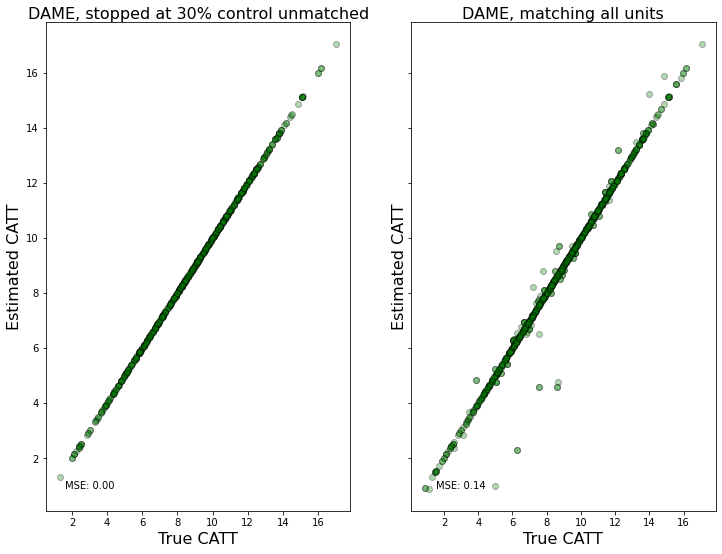

In [2]:
f, axes = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,9), sharey=True)

def draw_scatter(ax, x, y, title, color, mse, yticks= False):
    ax.scatter(x, y, c = color, alpha = 0.3, marker = 'o', edgecolor = 'black')
    ax.set_title(title, pad = 0.2, wrap = True, fontsize=16)
    ax.tick_params()    
    ax.set_ylabel("Estimated CATT", fontsize=16)
    ax.text(3, 1, "MSE: {:.2f}".format(mse), ha='center', va='center')
    ax.set_xlabel('True CATT', fontsize=16)


draw_scatter(axes[0], true_catt_early, estimated_catt_early, "DAME, stopped at 30% control unmatched",  "green", 
             mean_squared_error(true_catt_early, estimated_catt_early), True)

draw_scatter(axes[1], true_catt_full, estimated_catt_full, "DAME, matching all units",  "green", 
             mean_squared_error(true_catt_full, estimated_catt_full), True)

plt.savefig('early_stopping.png')